In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

C:\Users\febi2\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Step 1: Load Dataset
df = pd.read_csv("AB_NYC_2019.csv")

In [3]:
# Step 2: Data Cleaning
df = df.dropna(subset=['price'])
df = df[df['price'] < 1000]  # Removing extreme values

# Preserve a copy of the dataset before encoding for visualization
df_original = df.copy()

# Fill missing values in reviews_per_month with 0
df['reviews_per_month'].fillna(0, inplace=True)

C:\Users\febi2\AppData\Local\Temp\ipykernel_12356\1376241751.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


C:\Users\febi2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


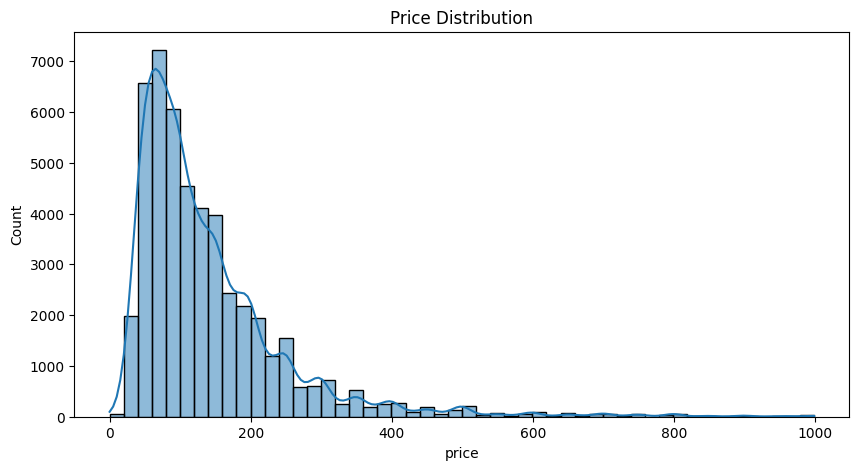

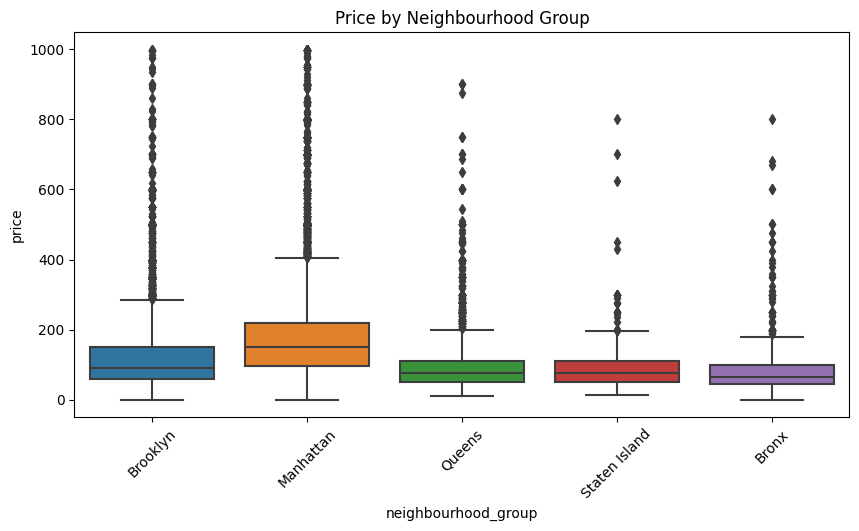

In [4]:
# Step 3: Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,5))
sns.histplot(df_original['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='neighbourhood_group', y='price', data=df_original)
plt.xticks(rotation=45)
plt.title("Price by Neighbourhood Group")
plt.show()

In [5]:
# Step 4: Feature Engineering
df = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=True)
features = ['latitude', 'longitude', 'number_of_reviews', 'reviews_per_month', 'availability_365',
            'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
            'room_type_Private room', 'room_type_Shared room']
X = df[features]
y = df['price']

# Ensure no NaN values remain in features
X = X.fillna(0)

In [6]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 6: Train Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Step 7: Predictions
y_pred = model.predict(X_test)

In [9]:
# Step 8: Model Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 54.76477929417756
R-squared Score: 0.32187911105996514


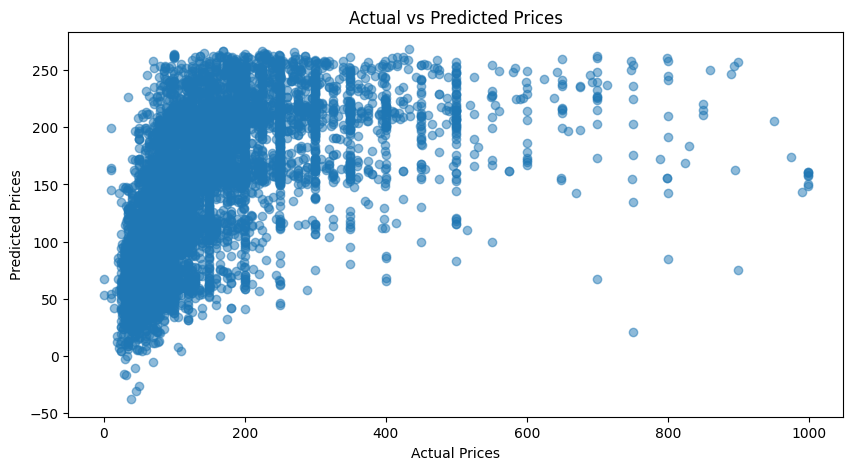

In [10]:
# Step 9: Visualization of Predicted vs Actual Prices
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()